In [1]:
from typing import Optional, List

In [2]:
!git clone https://github.com/rahim-xelpmoc/searchformer.git

Cloning into 'searchformer'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 138 (delta 51), reused 129 (delta 46), pack-reused 0 (from 0)
Receiving objects: 100% (138/138), 2.14 MiB | 4.63 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [3]:
!pip install -q -r /content/searchformer/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install -q pymongo
!pip install -q networkx

In [5]:
import sys

sys.path.append("/content/searchformer/")

In [6]:
from searchformer.maze import MazeTraceDataset, MazeTrace, SimpleMazeTokenizer

In [7]:
maze_trace_dataset = MazeTraceDataset(name="maze_trace_db")
maze_trace_ds = maze_trace_dataset.generate(is_test=True, width=10, height=10, deterministic=True, seed=42)

{'spec': {'width': 10, 'height': 10, 'start': {'x': 2, 'y': 1}, 'goal': {'x': 8, 'y': 3}, 'walls': [{'x': 1, 'y': 0}, {'x': 8, 'y': 0}, {'x': 9, 'y': 0}, {'x': 0, 'y': 1}, {'x': 5, 'y': 1}, {'x': 1, 'y': 2}, {'x': 6, 'y': 2}, {'x': 0, 'y': 3}, {'x': 2, 'y': 3}, {'x': 3, 'y': 3}, {'x': 7, 'y': 3}, {'x': 1, 'y': 4}, {'x': 2, 'y': 4}, {'x': 4, 'y': 4}, {'x': 5, 'y': 4}, {'x': 7, 'y': 4}, {'x': 8, 'y': 4}, {'x': 9, 'y': 4}, {'x': 0, 'y': 5}, {'x': 5, 'y': 5}, {'x': 6, 'y': 5}, {'x': 9, 'y': 5}, {'x': 3, 'y': 6}, {'x': 5, 'y': 6}, {'x': 0, 'y': 7}, {'x': 2, 'y': 7}, {'x': 3, 'y': 7}, {'x': 4, 'y': 7}, {'x': 6, 'y': 7}, {'x': 8, 'y': 7}, {'x': 0, 'y': 8}, {'x': 3, 'y': 8}, {'x': 7, 'y': 8}, {'x': 1, 'y': 9}, {'x': 2, 'y': 9}, {'x': 6, 'y': 9}]}, 'trace': [{'action': 'create', 'state': {'x': 2, 'y': 1}, 'cost_from_start': 0.0, 'heuristic': 8.0, 'path': ''}, {'action': 'close', 'state': {'x': 2, 'y': 1}, 'cost_from_start': 0.0, 'heuristic': 8.0, 'path': ''}, {'action': 'create', 'state': {'x':

In [8]:
len(maze_trace_ds)

2

**Note:** We are setting a seed to make the above generated dataset reproducible.

In [9]:
traces = list(maze_trace_ds.values())
maze_trace = MazeTrace.from_dict(traces[0])
maze_tokenizer = SimpleMazeTokenizer(height=10, width=10)
tokens = maze_tokenizer.tokenize(maze_trace)

In [10]:
def generate_maze_board_without_border(prompt, height, width):
    maze_board=[[" " for _ in range(width)] for _ in range(height)]
    for i in range(0, len(prompt), 3):
        object_ = prompt[i]
        x = int(prompt[i + 1])
        y = int(prompt[i + 2])
        if object_ == "wall":
            maze_board[x][y] = "#"
        elif object_ == "start":
            maze_board[x][y] = "@"
        elif object_ == "goal":
            maze_board[x][y] = "."
    return maze_board

In [11]:
maze = generate_maze_board_without_border(tokens.prompt, width=10, height=10)
maze_inverted_view = list(reversed(maze))
maze_inverted_view

[['#', ' ', ' ', ' ', '#', '#', ' ', ' ', ' ', ' '],
 ['#', ' ', ' ', '.', '#', ' ', ' ', '#', ' ', ' '],
 [' ', ' ', ' ', '#', '#', ' ', ' ', ' ', '#', ' '],
 [' ', ' ', '#', ' ', ' ', '#', ' ', '#', ' ', '#'],
 [' ', '#', ' ', ' ', '#', '#', '#', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', '#', ' ', ' ', '#', ' ', ' '],
 [' ', ' ', ' ', '#', ' ', ' ', '#', '#', '#', ' '],
 [' ', '@', ' ', '#', '#', ' ', ' ', '#', ' ', '#'],
 ['#', ' ', '#', ' ', '#', ' ', ' ', ' ', ' ', '#'],
 [' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', ' ']]

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_maze(prompt):
    prompt = list(reversed(prompt))
    height, width = len(prompt), len(prompt[0])
    grid = np.zeros((height, width), dtype=int)  # 0 -> empty, 1 -> wall, 2 -> start, 3 -> goal

    for i in range(height):
        for j in range(width):
            if prompt[i][j] == "#":
                grid[i][j] = 1
            elif prompt[i][j] == "@":
                grid[i][j] = 2
            elif prompt[i][j] == ".":
                grid[i][j] = 3
    colors = {
        0: 'white',   # empty
        1: 'black',   # wall
        2: 'green',   # start
        3: 'red'      # goal
    }

    fig, ax = plt.subplots()
    for i in range(height):
        for j in range(width):
            color = colors[grid[i][j]]
            rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='gray')
            ax.add_patch(rect)

    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.set_xticks(np.arange(0, width + 1))
    ax.set_yticks(np.arange(0, height + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    ax.grid(True)
    plt.show()

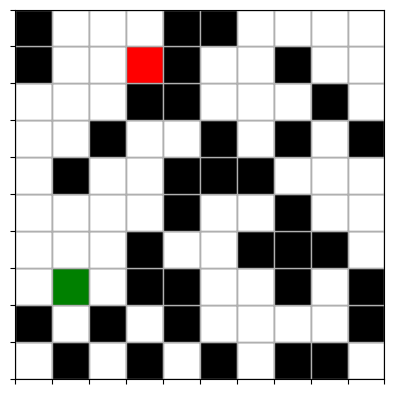

In [13]:
visualize_maze(maze_inverted_view)

In [14]:
def get_neighbors(r, c, maze):
    neighbors = []
    rows, cols = len(maze), len(maze[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right
    for dr, dc in directions:
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] in {' ', '.', '@'}:
            neighbors.append((nr, nc))
    return neighbors

def get_adjacency_list(maze):
    adjacency_list = {}
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] in {' ', '.', '@'}:
                adjacency_list[(i, j)] = get_neighbors(i, j, maze)
    return adjacency_list

In [15]:
adjacency_list_tuples = get_adjacency_list(maze)
adjacency_list_tuples = {k: v for k, v in adjacency_list_tuples.items() if v != []}
adjacency_list_tuples

{(0, 6): [(1, 6)],
 (1, 1): [(2, 1)],
 (1, 5): [(2, 5), (1, 6)],
 (1, 6): [(0, 6), (2, 6), (1, 5), (1, 7)],
 (1, 7): [(1, 6), (1, 8)],
 (1, 8): [(2, 8), (1, 7)],
 (2, 0): [(3, 0), (2, 1)],
 (2, 1): [(1, 1), (3, 1), (2, 0), (2, 2)],
 (2, 2): [(3, 2), (2, 1)],
 (2, 5): [(1, 5), (3, 5), (2, 6)],
 (2, 6): [(1, 6), (2, 5)],
 (2, 8): [(1, 8)],
 (3, 0): [(2, 0), (4, 0), (3, 1)],
 (3, 1): [(2, 1), (4, 1), (3, 0), (3, 2)],
 (3, 2): [(2, 2), (4, 2), (3, 1)],
 (3, 4): [(3, 5)],
 (3, 5): [(2, 5), (4, 5), (3, 4)],
 (3, 9): [(4, 9)],
 (4, 0): [(3, 0), (5, 0), (4, 1)],
 (4, 1): [(3, 1), (4, 0), (4, 2)],
 (4, 2): [(3, 2), (5, 2), (4, 1), (4, 3)],
 (4, 3): [(5, 3), (4, 2)],
 (4, 5): [(3, 5), (4, 6)],
 (4, 6): [(4, 5)],
 (4, 8): [(5, 8), (4, 9)],
 (4, 9): [(3, 9), (5, 9), (4, 8)],
 (5, 0): [(4, 0), (6, 0)],
 (5, 2): [(4, 2), (5, 3)],
 (5, 3): [(4, 3), (6, 3), (5, 2)],
 (5, 7): [(5, 8)],
 (5, 8): [(4, 8), (6, 8), (5, 7), (5, 9)],
 (5, 9): [(4, 9), (5, 8)],
 (6, 0): [(5, 0), (7, 0), (6, 1)],
 (6, 1): [(7,

In [16]:
import networkx as nx

def visualize_adjacency_list(adjacency_list):
    G = nx.Graph()
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = {node: (node[1], node[0]) for node in G.nodes()}  # Invert y-coordinates for correct display.
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
    plt.title("Maze - Adjacency List Visualization")
    plt.show()

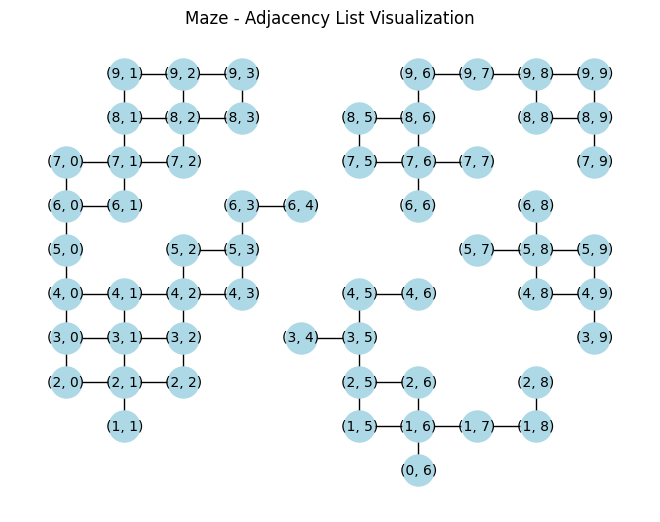

In [17]:
visualize_adjacency_list(adjacency_list_tuples)

In [18]:
print(traces[0]['spec']['start'])
print(traces[0]['spec']['goal'])

{'x': 2, 'y': 1}
{'x': 8, 'y': 3}


In [19]:
start_tuple = (traces[0]['spec']['start']['x'], traces[0]['spec']['start']['y'])
goal_tuple = (traces[0]['spec']['goal']['x'], traces[0]['spec']['goal']['y'])
print(start_tuple)
print(goal_tuple)

(2, 1)
(8, 3)


In [20]:
start_int = start_tuple[0] * 10 + start_tuple[1]
goal_int = goal_tuple[0] * 10 + goal_tuple[1]
print(start_int)
print(goal_int)

21
83


In [21]:
def get_adj_list_ints_and_heuristics(adjacency_list_tuples, goal_tuple):
    adjacency_list_ints = dict()
    heuristics = dict()
    for k, v in adjacency_list_tuples.items():
        new_k = k[0] * 10 + k[1]
        new_v = []
        for neighbor in v:
            new_neighbor = neighbor[0] * 10 + neighbor[1]
            new_v.append(new_neighbor)
        adjacency_list_ints[new_k] = new_v

        h = abs(k[0] - goal_tuple[0]) + abs(k[1] - goal_tuple[1]) # Manhatten distance.
        heuristics[new_k] = h
    return adjacency_list_ints, heuristics

In [22]:
adjacency_list_ints, heuristics = get_adj_list_ints_and_heuristics(adjacency_list_tuples, goal_tuple)

In [23]:
adjacency_list_ints

{6: [16],
 11: [21],
 15: [25, 16],
 16: [6, 26, 15, 17],
 17: [16, 18],
 18: [28, 17],
 20: [30, 21],
 21: [11, 31, 20, 22],
 22: [32, 21],
 25: [15, 35, 26],
 26: [16, 25],
 28: [18],
 30: [20, 40, 31],
 31: [21, 41, 30, 32],
 32: [22, 42, 31],
 34: [35],
 35: [25, 45, 34],
 39: [49],
 40: [30, 50, 41],
 41: [31, 40, 42],
 42: [32, 52, 41, 43],
 43: [53, 42],
 45: [35, 46],
 46: [45],
 48: [58, 49],
 49: [39, 59, 48],
 50: [40, 60],
 52: [42, 53],
 53: [43, 63, 52],
 57: [58],
 58: [48, 68, 57, 59],
 59: [49, 58],
 60: [50, 70, 61],
 61: [71, 60],
 63: [53, 64],
 64: [63],
 66: [76],
 68: [58],
 70: [60, 71],
 71: [61, 81, 70, 72],
 72: [82, 71],
 75: [85, 76],
 76: [66, 86, 75, 77],
 77: [76],
 79: [89],
 81: [71, 91, 82],
 82: [72, 92, 81, 83],
 83: [93, 82],
 85: [75, 86],
 86: [76, 96, 85],
 88: [98, 89],
 89: [79, 99, 88],
 91: [81, 92],
 92: [82, 91, 93],
 93: [83, 92],
 96: [86, 97],
 97: [96, 98],
 98: [88, 97, 99],
 99: [89, 98]}

In [24]:
heuristics

{6: 11,
 11: 9,
 15: 9,
 16: 10,
 17: 11,
 18: 12,
 20: 9,
 21: 8,
 22: 7,
 25: 8,
 26: 9,
 28: 11,
 30: 8,
 31: 7,
 32: 6,
 34: 6,
 35: 7,
 39: 11,
 40: 7,
 41: 6,
 42: 5,
 43: 4,
 45: 6,
 46: 7,
 48: 9,
 49: 10,
 50: 6,
 52: 4,
 53: 3,
 57: 7,
 58: 8,
 59: 9,
 60: 5,
 61: 4,
 63: 2,
 64: 3,
 66: 5,
 68: 7,
 70: 4,
 71: 3,
 72: 2,
 75: 3,
 76: 4,
 77: 5,
 79: 7,
 81: 2,
 82: 1,
 83: 0,
 85: 2,
 86: 3,
 88: 5,
 89: 6,
 91: 3,
 92: 2,
 93: 1,
 96: 4,
 97: 5,
 98: 6,
 99: 7}

In [25]:
from openai import OpenAI
from google.colab import userdata

client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

In [26]:
class MinHeap:
    def __init__(self):
        self.heap = dict()

    def push(self, key, value):
        self.heap[key] = value
        return "Push successful."

    def contains(self, key):
        return key in self.heap

    def update_value(self, key, value):
        self.heap[key] = value
        return "The value of the provided key has been updated."

    def pop(self):
        min_key = min(self.heap, key=self.heap.get)
        del self.heap[min_key]
        return min_key

    def __len__(self):
        return len(self.heap)

    def is_empty(self):
        return len(self.heap) == 0

    def __repr__(self):
        return self.heap.__repr__()

In [27]:
class Costs:
    def __init__(self, graph):
        self.costs = {node_id: float('inf') for node_id in graph.keys()}

    def update(self, node, cost):
        self.costs[node] = cost
        return "The `costs` dictionary has been updated."

    def fetch(self, node):
        return self.costs[node]

In [28]:
class Visited:
    def __init__(self):
        self.visited = set()

    def add(self, element):
        self.visited.add(element)
        return "The provided element has been added to the set."

    def contains(self, element):
        return element in self.visited

In [29]:
class Path:
    def __init__(self, graph):
        self.path = {node_id: -1 for node_id in graph.keys()}

    def update(self, node, previous_node):
        self.path[node] = previous_node
        return "Update successful."

    def trace(self, from_node: int) -> list:
        reverse_path_trace = []
        current = from_node
        while current != -1:
            reverse_path_trace.append(current)
            current = self.path[current]
        final_path_trace = reverse_path_trace[::-1]
        return final_path_trace

In [30]:
import copy

class FewShotSearchMazeNavigationAStar:
    def __init__(
            self,
            client: OpenAI,
            model: str,
            graph: dict,
            messages: List[dict],
            input_seq: str
    ):
        self.client = client
        self.model = model
        self.graph = graph
        self.messages = copy.deepcopy(messages)
        self.input_seq = input_seq
        self.messages.append({'role': "user", 'content': input_seq})

    def chat_completion(
            self,
            messages: List[dict],
            model: str,
            temperature: float = 0.2,
            max_tokens: int = 4096,
            n: int = 1,
            stop: str = "\nObservation:",
            **kwargs
    ) -> str:
        response = self.client.chat.completions.create(
            messages=messages,
            model=model,
            temperature=temperature,
            max_tokens=max_tokens,
            n=n,
            stop=stop,
            **kwargs
        )
        return response.choices[0].message.content

    def initialize_heap(self):
        self.heap = MinHeap()
        return "An empty priority queue has been initialized."

    def initialize_visited(self):
        self.visited = Visited()
        return "An empty set has been initialized."

    def initialize_costs(self):
        self.costs = Costs(self.graph)
        return "An empty dictionary has been initialized."

    def initialize_path(self):
        self.path = Path(self.graph)
        return "An empty data structure (to store path related information) has been initialized."

    def react_loop(self, step_limit: Optional[int] = None):
        i = 0
        while True:
            if step_limit is not None and i >= step_limit:
                print("Step limit reached! Breaking the ReAct loop...")
                break
            completion = self.chat_completion(self.messages, model=self.model)
            print(completion)
            j = 0
            while len(completion) == 0:
                # Sometimes, the OpenAI API is returning an empty string. In such cases, calling the API again is solving the issue.
                print("***")
                print("EMPTY COMPLETION!!! Trying again...")
                completion = self.chat_completion(self.messages, model=self.model)
                print(completion)
                print("***")
                j += 1
                if j >= 5:
                    break
            print("---")
            if 'The search was unsuccessful!' in completion or 'The final path is:' in completion:
                self.messages.append({'role': "assistant", 'content': completion})
                return "-- end of search --"
            else: # A tool call was made.
                tool_call_string = completion.split('Action: ')[-1].strip()
                if 'initialize_heap' in tool_call_string or 'initialize_visited' in tool_call_string or 'initialize_costs' in tool_call_string or 'initialize_path' in tool_call_string or 'costs.update' in tool_call_string or 'costs.fetch' in tool_call_string or 'heap.push' in tool_call_string or 'heap.is_empty' in tool_call_string or 'heap.pop' in tool_call_string or 'heap.contains' in tool_call_string or 'visited.add' in tool_call_string or 'visited.contains' in tool_call_string or 'path.update' in tool_call_string or 'path.trace' in tool_call_string:
                    tool_call_string = tool_call_string.replace('initialize_heap', 'self.initialize_heap')
                    tool_call_string = tool_call_string.replace('initialize_visited', 'self.initialize_visited')
                    tool_call_string = tool_call_string.replace('initialize_costs', 'self.initialize_costs')
                    tool_call_string = tool_call_string.replace('initialize_path', 'self.initialize_path')
                    tool_call_string = tool_call_string.replace('costs.update', 'self.costs.update')
                    tool_call_string = tool_call_string.replace('costs.fetch', 'self.costs.fetch')
                    tool_call_string = tool_call_string.replace('heap.push', 'self.heap.push')
                    tool_call_string = tool_call_string.replace('heap.is_empty', 'self.heap.is_empty')
                    tool_call_string = tool_call_string.replace('heap.pop', 'self.heap.pop')
                    tool_call_string = tool_call_string.replace('heap.contains', 'self.heap.contains')
                    tool_call_string = tool_call_string.replace('visited.add', 'self.visited.add')
                    tool_call_string = tool_call_string.replace('visited.contains', 'self.visited.contains')
                    tool_call_string = tool_call_string.replace('path.update', 'self.path.update')
                    tool_call_string = tool_call_string.replace('path.trace', 'self.path.trace')
                    result = eval(tool_call_string)
                    print(result)
                    print("---")
                else:
                    raise AssertionError("Invalid tool call string!")
                completion += "\nObservation:\n"
                self.messages.append({'role': "assistant", 'content': completion})
                self.messages.append({'role': "user", 'content': str(result)})
            i += 1

Let's fetch the few-shot examples.

In [31]:
!git clone https://github.com/sambitmukherjee/few-shot-search.git

Cloning into 'few-shot-search'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 29.59 KiB | 4.93 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [32]:
%cd few-shot-search

/content/few-shot-search


In [33]:
from few_shot_examples.maze_navigation_a_star_2_shot_examples import *

In [34]:
len(messages)

740

In [35]:
messages[0]

{'role': 'user',
 'content': 'The graph is:\n{13: [23, 14],\n 14: [24, 13],\n 20: [21],\n 21: [31, 20],\n 23: [13, 33, 24],\n 24: [14, 23],\n 26: [36],\n 31: [21, 32],\n 32: [42, 31, 33],\n 33: [23, 43, 32],\n 36: [26, 37],\n 37: [36, 38],\n 38: [37],\n 40: [50],\n 42: [32, 52, 43],\n 43: [33, 53, 42],\n 50: [40, 60],\n 52: [42, 62, 53],\n 53: [43, 52],\n 55: [65, 56],\n 56: [66, 55, 57],\n 57: [67, 56],\n 60: [50, 70],\n 62: [52],\n 65: [55, 75, 66],\n 66: [56, 76, 65, 67],\n 67: [57, 77, 66, 68],\n 68: [78, 67],\n 70: [60, 80, 71],\n 71: [81, 70],\n 73: [83, 74],\n 74: [84, 73, 75],\n 75: [65, 74, 76],\n 76: [66, 75, 77],\n 77: [67, 87, 76, 78],\n 78: [68, 88, 77],\n 80: [70, 90, 81],\n 81: [71, 91, 80, 82],\n 82: [92, 81, 83],\n 83: [73, 82, 84],\n 84: [74, 94, 83],\n 87: [77, 97, 88],\n 88: [78, 98, 87],\n 90: [80, 91],\n 91: [81, 90, 92],\n 92: [82, 91],\n 94: [84],\n 96: [97],\n 97: [87, 96, 98],\n 98: [88, 97, 99],\n 99: [98]}\n\nThe `start` node is: 20\n\nThe `goal` node is: 57

In [36]:
messages[-1]

{'role': 'assistant',
 'content': '\n\nThe final path is:\n[81, 82, 83, 73, 74, 75, 65, 66, 67]'}

In [37]:
system_prompt = """Your task is to role-play a particular type of graph search algorithm.

To help you mimic this algorithm successfully, you will be provided few-shot examples. Study these examples carefully to learn how to mimic the algorithm successfully.
You must adhere to the reasoning style and choice of words in these few-shot examples. Do not use any new words that aren't present in the few-shot examples."""

In [38]:
messages = [{'role': "system", 'content': system_prompt}] + messages

In [39]:
def get_pretty_dictionary(dictionary):
    i = 0
    pretty_dictionary = "{"
    for k, v in dictionary.items():
        if i == 0:
            pretty_dictionary += f"{k}: {v}\n"
        else:
            pretty_dictionary += f" {k}: {v}\n"
        i += 1
    pretty_dictionary = pretty_dictionary.strip()
    pretty_dictionary += "}"
    return pretty_dictionary

In [40]:
pretty_graph = get_pretty_dictionary(adjacency_list_ints)
print(pretty_graph)

{6: [16]
 11: [21]
 15: [25, 16]
 16: [6, 26, 15, 17]
 17: [16, 18]
 18: [28, 17]
 20: [30, 21]
 21: [11, 31, 20, 22]
 22: [32, 21]
 25: [15, 35, 26]
 26: [16, 25]
 28: [18]
 30: [20, 40, 31]
 31: [21, 41, 30, 32]
 32: [22, 42, 31]
 34: [35]
 35: [25, 45, 34]
 39: [49]
 40: [30, 50, 41]
 41: [31, 40, 42]
 42: [32, 52, 41, 43]
 43: [53, 42]
 45: [35, 46]
 46: [45]
 48: [58, 49]
 49: [39, 59, 48]
 50: [40, 60]
 52: [42, 53]
 53: [43, 63, 52]
 57: [58]
 58: [48, 68, 57, 59]
 59: [49, 58]
 60: [50, 70, 61]
 61: [71, 60]
 63: [53, 64]
 64: [63]
 66: [76]
 68: [58]
 70: [60, 71]
 71: [61, 81, 70, 72]
 72: [82, 71]
 75: [85, 76]
 76: [66, 86, 75, 77]
 77: [76]
 79: [89]
 81: [71, 91, 82]
 82: [72, 92, 81, 83]
 83: [93, 82]
 85: [75, 86]
 86: [76, 96, 85]
 88: [98, 89]
 89: [79, 99, 88]
 91: [81, 92]
 92: [82, 91, 93]
 93: [83, 92]
 96: [86, 97]
 97: [96, 98]
 98: [88, 97, 99]
 99: [89, 98]}


In [41]:
pretty_heuristics = get_pretty_dictionary(heuristics)
print(pretty_heuristics)

{6: 11
 11: 9
 15: 9
 16: 10
 17: 11
 18: 12
 20: 9
 21: 8
 22: 7
 25: 8
 26: 9
 28: 11
 30: 8
 31: 7
 32: 6
 34: 6
 35: 7
 39: 11
 40: 7
 41: 6
 42: 5
 43: 4
 45: 6
 46: 7
 48: 9
 49: 10
 50: 6
 52: 4
 53: 3
 57: 7
 58: 8
 59: 9
 60: 5
 61: 4
 63: 2
 64: 3
 66: 5
 68: 7
 70: 4
 71: 3
 72: 2
 75: 3
 76: 4
 77: 5
 79: 7
 81: 2
 82: 1
 83: 0
 85: 2
 86: 3
 88: 5
 89: 6
 91: 3
 92: 2
 93: 1
 96: 4
 97: 5
 98: 6
 99: 7}


In [42]:
new_input_seq1 = f'''The graph is:
{pretty_graph}

The `start` node is: {start_int}

The `goal` node is: {goal_int}

The `heuristics` dictionary is:
{pretty_heuristics}'''
print(new_input_seq1)

The graph is:
{6: [16]
 11: [21]
 15: [25, 16]
 16: [6, 26, 15, 17]
 17: [16, 18]
 18: [28, 17]
 20: [30, 21]
 21: [11, 31, 20, 22]
 22: [32, 21]
 25: [15, 35, 26]
 26: [16, 25]
 28: [18]
 30: [20, 40, 31]
 31: [21, 41, 30, 32]
 32: [22, 42, 31]
 34: [35]
 35: [25, 45, 34]
 39: [49]
 40: [30, 50, 41]
 41: [31, 40, 42]
 42: [32, 52, 41, 43]
 43: [53, 42]
 45: [35, 46]
 46: [45]
 48: [58, 49]
 49: [39, 59, 48]
 50: [40, 60]
 52: [42, 53]
 53: [43, 63, 52]
 57: [58]
 58: [48, 68, 57, 59]
 59: [49, 58]
 60: [50, 70, 61]
 61: [71, 60]
 63: [53, 64]
 64: [63]
 66: [76]
 68: [58]
 70: [60, 71]
 71: [61, 81, 70, 72]
 72: [82, 71]
 75: [85, 76]
 76: [66, 86, 75, 77]
 77: [76]
 79: [89]
 81: [71, 91, 82]
 82: [72, 92, 81, 83]
 83: [93, 82]
 85: [75, 86]
 86: [76, 96, 85]
 88: [98, 89]
 89: [79, 99, 88]
 91: [81, 92]
 92: [82, 91, 93]
 93: [83, 92]
 96: [86, 97]
 97: [96, 98]
 98: [88, 97, 99]
 99: [89, 98]}

The `start` node is: 21

The `goal` node is: 83

The `heuristics` dictionary is:
{6: 11


In [43]:
few_shot_search = FewShotSearchMazeNavigationAStar(client, "gpt-4o", adjacency_list_ints, messages, new_input_seq1)

In [44]:
few_shot_search.react_loop()



Initializing the `heap` priority queue.

Action: initialize_heap()

---
An empty priority queue has been initialized.
---


Initializing the `visited` set.

Action: initialize_visited()

---
An empty set has been initialized.
---


Initializing the `costs` dictionary.

Action: initialize_costs()

---
An empty dictionary has been initialized.
---


Initializing the `path` data structure.

Action: initialize_path()

---
An empty data structure (to store path related information) has been initialized.
---


Starting the graph search.

The cost of the `start` node (21) is 0. Updating the `costs` dictionary accordingly.

Action: costs.update(node=21, cost=0)

---
The `costs` dictionary has been updated.
---


Examining the `heuristics` dictionary to fetch the heuristic of the `start` node.
The heuristic of the `start` node is: 8

The estimated value of the `start` node is its cost plus its heuristic.
Estimated value = 0 + 8 = 8

Pushing the `start` node, along with its estimated value int

'-- end of search --'